In [1]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
import gc

from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.metrics import mean_squared_error
#from catboost import Pool, CatBoostRegressor
from xgboost import XGBRegressor
from itertools import combinations
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")
#import optuna

plt.rcParams["figure.figsize"] = (20,15)

/Users/rodrigoassar/opt/anaconda3/lib/python3.7/site-packages/dask/dataframe/utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!pip install catboost

In [3]:
!pip install tqdm

In [4]:
train = pd.read_csv("train.csv")
og_feat = train.columns[1:-1]
test = pd.read_csv("test.csv")
sample_submission =pd.read_csv("sample_submission.csv")
print("Train:", train.shape)
print("Test:", test.shape)

Train: (300000, 26)
Test: (200000, 25)


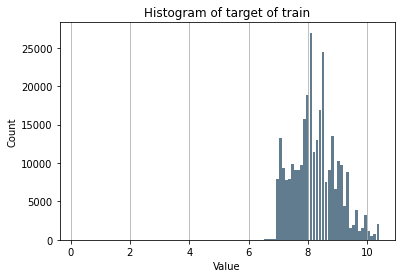

In [5]:
size, scale = 1000, 10
targets = pd.Series(train.target)

targets.plot.hist(grid=True, bins=100, rwidth=0.9,
                   color='#607c8e')
plt.title('Histogram of target of train')
plt.ylabel('Count')
plt.xlabel('Value')
plt.grid(axis='y', alpha=0.75)

In [6]:
(targets<6.8).value_counts()

False    299338
True        662
Name: target, dtype: int64

In [7]:
targets.describe()

count    300000.000000
mean          8.241979
std           0.746555
min           0.140329
25%           7.742071
50%           8.191373
75%           8.728634
max          10.411992
Name: target, dtype: float64

In [8]:
cota=8.191373

In [9]:
train.targetclass=(train.target>cota)

In [10]:
train.targetclass.value_counts()

False    150000
True     150000
Name: target, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
import xgboost as xgb
import numpy as np
import itertools

import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from xgboost import XGBClassifier

In [12]:
nrows=train.shape[0]
ncols=train.shape[1]

In [13]:
ordinal_encoder = OrdinalEncoder()
useful_features = [c for c in train.columns if c not in ("id", "target")]
object_cols = [col for col in useful_features if 'cat' in col]
test = test[useful_features]

In [14]:
train_features, test_features, train_labels, test_labels = train_test_split(train.iloc[range(0,nrows),range(0,ncols-1)],train.targetclass,test_size=0.25)


In [15]:
train_labels.value_counts()

False    112806
True     112194
Name: target, dtype: int64

In [16]:
test_labels.value_counts()

True     37806
False    37194
Name: target, dtype: int64

In [17]:
train.columns

Index(['id', 'cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7',
       'cat8', 'cat9', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5',
       'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12',
       'cont13', 'target'],
      dtype='object')

Random Forest for targetclass classification

In [18]:
train_features = train_features[useful_features]
test_features = test_features[useful_features]
train_features[object_cols] = ordinal_encoder.fit_transform(train_features[object_cols])
#xvalid[object_cols] = ordinal_encoder.transform(xvalid[object_cols])
test_features[object_cols] = ordinal_encoder.transform(test_features[object_cols])

In [19]:
train_features.describe()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
count,225000.000000,225000.000000,225000.000000,225000.000000,225000.000000,225000.000000,225000.000000,225000.000000,225000.000000,225000.000000,...,225000.000000,225000.000000,225000.000000,225000.000000,225000.000000,225000.000000,225000.000000,225000.000000,225000.000000,225000.000000
mean,0.357329,0.483147,0.154058,1.800969,0.999409,1.894702,0.041182,3.898138,2.397529,7.387782,...,0.491938,0.510594,0.467312,0.536937,0.498436,0.474866,0.474476,0.473391,0.494497,0.508579
std,0.479214,0.499717,0.361005,0.631940,0.151069,0.981935,0.280051,0.564249,1.834255,3.421667,...,0.240314,0.228279,0.210042,0.218115,0.239944,0.217935,0.255759,0.221976,0.247375,0.223035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.255908,0.045915,-0.224689,0.203771,-0.260275,0.117896,0.048732,0.052612,-0.074208,0.151050
25%,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,4.000000,0.000000,5.000000,...,0.284199,0.354156,0.342875,0.355548,0.332516,0.306908,0.276635,0.308308,0.288986,0.300855
50%,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,4.000000,2.000000,8.000000,...,0.391509,0.488930,0.429169,0.504578,0.438975,0.434500,0.459630,0.433906,0.422729,0.472621
75%,1.000000,1.000000,0.000000,2.000000,1.000000,3.000000,0.000000,4.000000,4.000000,10.000000,...,0.696887,0.669793,0.573019,0.703227,0.606043,0.614340,0.691368,0.642204,0.714685,0.758489
max,1.000000,1.000000,1.000000,3.000000,3.000000,3.000000,7.000000,7.000000,6.000000,14.000000,...,1.055424,1.067649,1.111552,1.032837,1.040229,0.982922,1.055960,1.071435,0.975035,0.905992


In [20]:
rf=RandomForestClassifier(n_estimators=1000)

In [21]:
rf.fit(train_features,train_labels)

RandomForestClassifier(n_estimators=1000)

In [22]:
features_imp=pd.Series(rf.feature_importances_,index=train_features.columns).sort_values(ascending=False)
features_imp

cont10    0.066968
cont12    0.066294
cont2     0.065053
cont9     0.065050
cont3     0.063975
cont5     0.063961
cont4     0.063722
cont13    0.063653
cont7     0.063526
cont0     0.063440
cont6     0.063347
cont11    0.063155
cont1     0.062984
cont8     0.062925
cat9      0.034949
cat8      0.015513
cat5      0.010189
cat0      0.008865
cat3      0.007577
cat1      0.006993
cat2      0.006414
cat7      0.006140
cat6      0.003241
cat4      0.002070
dtype: float64

No handles with labels found to put in legend.


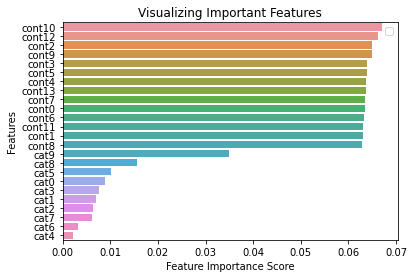

In [23]:
sns.barplot(x=features_imp, y=features_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [24]:
test_predlabels=rf.predict(test_features)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(test_labels, test_predlabels))

Accuracy: 0.55136


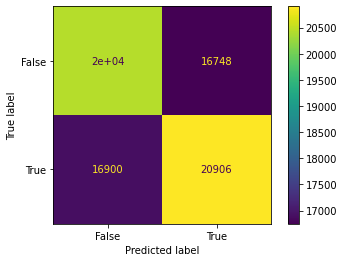

In [25]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
confusion_matrix(test_labels, test_predlabels)
plot_confusion_matrix(rf, test_features, test_labels)  
plt.show()  

In [26]:
features = [c for c in test.columns if c not in ("id")]
features

['cat0',
 'cat1',
 'cat2',
 'cat3',
 'cat4',
 'cat5',
 'cat6',
 'cat7',
 'cat8',
 'cat9',
 'cont0',
 'cont1',
 'cont2',
 'cont3',
 'cont4',
 'cont5',
 'cont6',
 'cont7',
 'cont8',
 'cont9',
 'cont10',
 'cont11',
 'cont12',
 'cont13']

In [28]:
testOUT_features = test[features]
testOUT_features = testOUT_features[useful_features]
testOUT_features[object_cols] = ordinal_encoder.transform(testOUT_features[object_cols])
test_predtargetclassRF=rf.predict(testOUT_features)

In [29]:
pd.DataFrame(test_predtargetclassRF).value_counts()

True     100397
False     99603
dtype: int64

XGB classifier

In [34]:
bstxgb = XGBClassifier(learning_rate=0.1,colsample_bynode=0.6, colsample_bytree=0.6,max_depth=4,n_estimators=10000)
bstxgb.fit(train_features,train_labels)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=0.6, colsample_bytree=0.6, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10000, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [35]:
test_xgbpredlabels = bstxgb.predict(test_features)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

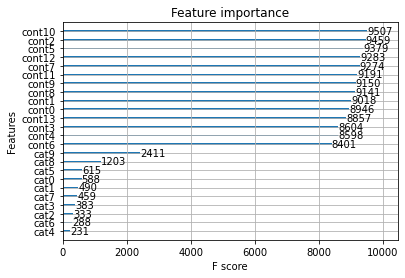

In [36]:
xgb.plot_importance(bstxgb)

In [37]:
print("Accuracy:",metrics.accuracy_score(test_labels, test_xgbpredlabels))

Accuracy: 0.5565066666666667


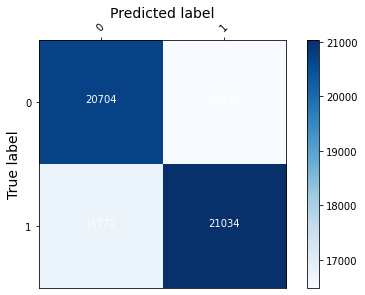

In [38]:
import numpy as np
class_names = [0,1]
matrix = confusion_matrix(test_labels,test_xgbpredlabels)
plt.clf()
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')
plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)

# plot colorbar to the right
plt.colorbar()

fmt = 'd'

# write the number of predictions in each bucket
thresh = matrix.max() / 2.

for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):

    # if background is dark, use a white number, and vice-versa
    plt.text(j, i, format(matrix[i, j], fmt),
         horizontalalignment="center",
         color="white" if matrix[i, j] > thresh else "black")

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.tight_layout()
plt.ylabel('True label',size=14)
plt.xlabel('Predicted label',size=14)
plt.show()

In [39]:
test_predtargetclassXGB=bstxgb.predict(testOUT_features)

In [40]:
pd.DataFrame(test_predtargetclassXGB).value_counts()

False    100128
True      99872
dtype: int64

RF vs XGB class prediction on test, different predictions!

In [41]:
confusion_matrix(test_predtargetclassRF,test_predtargetclassXGB)

array([[68670, 30933],
       [31458, 68939]])

In [42]:
train.target[train.targetclass].describe()

count    150000.000000
mean          8.832534
std           0.494348
min           8.191374
25%           8.459245
50%           8.728637
75%           9.095079
max          10.411992
Name: target, dtype: float64

In [43]:
train.target[train.targetclass==False].describe()

count    150000.000000
mean          7.651423
std           0.415687
min           0.140329
25%           7.308693
50%           7.742069
75%           8.015701
max           8.191372
Name: target, dtype: float64

In [52]:
submissionXGBClassifier=sample_submission
submissionXGBClassifier.target = 8.728637*test_predtargetclassXGB+7.742069*(test_predtargetclassXGB==False)
submissionXGBClassifier.to_csv("submission_XGBClassifier.csv", index=False)

In [53]:
submissionXGBClassifier.target.value_counts()

8.728637    100618
7.742069     99382
Name: target, dtype: int64

In [148]:
submissionXGBClassifier.to_csv("submission_XGBClassifier.csv", index=False)

Combining models RF and XGB

1) From targetclass predicted for each model we considered the fourth possible combinations (high,low),(high,high),(low,high),(low,low) and at each pair of predictions WE ASSIGN AN UNIQUE TARGET VALUE BEING THE MEDIAN OVER THE INTERNAL TEST (SUBSTRACTED FROM TRAIN)

In [44]:
test_labels[test_xgbpredlabels].describe()

count     37524
unique        2
top        True
freq      21034
Name: target, dtype: object

In [45]:
test_target=train.target[test_labels.index]

In [46]:
test_target1=test_target[test_labels==True]
test_target1.describe()

count    37806.000000
mean         8.832474
std          0.492446
min          8.191427
25%          8.459780
50%          8.732257
75%          9.095207
max         10.411992
Name: target, dtype: float64

In [47]:
cota

8.191373

In [48]:
test_target0=test_target[test_labels==False]
test_target0.describe()

count    37194.000000
mean         7.646585
std          0.419682
min          0.592095
25%          7.301038
50%          7.735216
75%          8.013651
max          8.191328
Name: target, dtype: float64

In [49]:
test_targetxgbpred1=test_target[test_xgbpredlabels==True]
test_targetxgbpred1.describe()

count    37524.000000
mean         8.365004
std          0.726291
min          3.887960
25%          7.917024
50%          8.352500
75%          8.832753
max         10.411992
Name: target, dtype: float64

In [50]:
test_targetxgbpred0=test_target[test_xgbpredlabels==False]
test_targetxgbpred0.describe()

count    37476.000000
mean         8.123577
std          0.752128
min          0.592095
25%          7.549606
50%          8.094665
75%          8.557212
max         10.411611
Name: target, dtype: float64

In [51]:
confusion_matrix(test_labels,test_xgbpredlabels)

array([[20704, 16490],
       [16772, 21034]])

In [52]:
set1=pd.Series(test_xgbpredlabels)
set2=pd.Series(test_predlabels)
both1=np.array((set1.astype(int)+set2.astype(int))==2)
both1
both0=np.array((set1.astype(int)+set2.astype(int))==0)

In [53]:
test_targetxgbyrfpred1=test_target[both1==True]
test_targetxgbyrfpred1.describe()

count    25978.000000
mean         8.406351
std          0.721114
min          3.887960
25%          7.965220
50%          8.398089
75%          8.856080
max         10.411992
Name: target, dtype: float64

In [54]:
test_targetxgbyrfpred0=test_target[both0==True]
test_targetxgbyrfpred0.describe()

count    25800.000000
mean         8.072521
std          0.751961
min          0.592095
25%          7.479910
50%          8.056965
75%          8.512442
max         10.411427
Name: target, dtype: float64

In [ ]:
cota

In [55]:
xgb0rf1=np.array((set1.astype(int)+set2.astype(int))*set2.astype(int)==1)
test_targetxgb0rf1=test_target[xgb0rf1==True]
test_targetxgb0rf1.describe()

count    11676.000000
mean         8.236392
std          0.740144
min          2.721227
25%          7.742099
50%          8.195854
75%          8.709739
max         10.411611
Name: target, dtype: float64

In [56]:
xgb1rf0=np.array((set2.astype(int)+set1.astype(int))*set1.astype(int)==1)
test_targetxgb1rf0=test_target[xgb1rf0==True]
test_targetxgb1rf0.describe()

count    11546.000000
mean         8.271977
std          0.729317
min          4.091981
25%          7.793847
50%          8.237550
75%          8.762035
max         10.411669
Name: target, dtype: float64

In [57]:
test_targetcombpred=8.406351*both1+8.072521*both0+8.271977*xgb1rf0+8.236392*xgb0rf1
pd.DataFrame(test_targetcombpred).describe()

,0
count,75000.000000
mean,8.244368
std,0.139193
min,8.072521
25%,8.072521
50%,8.271977
75%,8.406351
max,8.406351


RMSE

In [58]:
np.sqrt((np.square(test_target - test_targetcombpred)).mean()) #almost same obtained after submission

0.7360492421527394

Prepairing submission

In [59]:
Set1=pd.Series(test_predtargetclassXGB)
Set2=pd.Series(test_predtargetclassRF)
Both1=np.array((Set1.astype(int)+Set2.astype(int))==2)
Both0=np.array((Set1.astype(int)+Set2.astype(int))==0)
Xgb0rf1=np.array((Set1.astype(int)+Set2.astype(int))*Set2.astype(int)==1)
Xgb1rf0=np.array((Set2.astype(int)+Set1.astype(int))*Set1.astype(int)==1)


In [60]:
submissionCombClassifier=sample_submission
submissionCombClassifier.target = 8.406351*Both1+8.072521*Both0+8.271977*Xgb1rf0+8.236392*Xgb0rf1


In [61]:
submissionCombClassifier.target.value_counts()

8.406351    68939
8.072521    68670
8.236392    31458
8.271977    30933
Name: target, dtype: int64

In [62]:
submissionCombClassifier.to_csv("submission_CombClassifier1000lr01prop06.csv", index=False)

In [ ]:
#RMSE 1.02 not good

XGB with hyperparameters

In [156]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

In [157]:
parameters = {
    'max_depth': range (4, 8, 2),
    'n_estimators': range(100, 300, 100),
    'learning_rate': [0.1, 0.3, 0.5],
    'colsample_bynode': [0.6, 0.8, 1],
    'colsample_bytree': [0.6, 0.8, 1]
}

In [160]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 4,
    cv = 4,
    verbose=True
)

In [161]:
grid_search.fit(train_features,train_labels)

Fitting 4 folds for each of 108 candidates, totalling 432 fits


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, seed=42,
                                     subsample=None, tree_method

In [162]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=0.6, colsample_bytree=0.6, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=42, subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [163]:
Bstxgb = XGBClassifier(learning_rate=0.1,colsample_bynode=0.6, colsample_bytree=0.6,max_depth=4,n_estimators=200)
Bstxgb.fit(train_features,train_labels)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=0.6, colsample_bytree=0.6, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [164]:
test_xgbpredlabelsBst = Bstxgb.predict(test_features)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

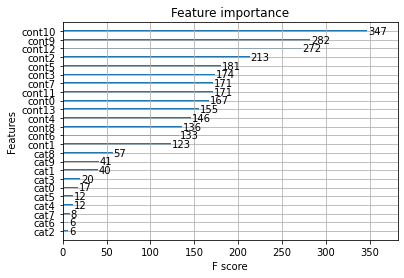

In [165]:
xgb.plot_importance(Bstxgb)

In [166]:
print("Accuracy:",metrics.accuracy_score(test_labels, test_xgbpredlabelsBst))

Accuracy: 0.5655866666666667


In [167]:
test_predtargetclassXGBBst=Bstxgb.predict(testOUT_features)

RF with adjustement

In [189]:
estimatorRF = RandomForestClassifier(
)


In [198]:
parametersRF = {
    'max_depth': range (4, 8, 2),
    'n_estimators': range(100, 500, 100),
    'min_samples_split': [0.0001, 0.001, 0.01],
    'criterion': ["gini", "entropy"],
    'max_features': ["sqrt","log2"]
}

In [199]:
grid_searchRF = GridSearchCV(
    estimator=estimatorRF,
    param_grid=parametersRF,
    scoring = 'roc_auc',
    n_jobs = 4,
    cv = 4,
    verbose=True
)

In [200]:
grid_searchRF.fit(train_features,train_labels)

Fitting 4 folds for each of 96 candidates, totalling 384 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(4, 8, 2),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [0.0001, 0.001, 0.01],
                         'n_estimators': range(100, 500, 100)},
             scoring='roc_auc', verbose=True)

In [201]:
grid_searchRF.best_estimator_

RandomForestClassifier(max_depth=6, max_features='log2',
                       min_samples_split=0.001, n_estimators=400)

In [202]:
rfBst=RandomForestClassifier(max_depth=6, max_features='log2',min_samples_split=0.001, n_estimators=400)

In [204]:
rfBst.fit(train_features,train_labels)

RandomForestClassifier(max_depth=6, max_features='log2',
                       min_samples_split=0.001, n_estimators=400)

In [205]:
test_rfpredlabelsBst = rfBst.predict(test_features)

No handles with labels found to put in legend.


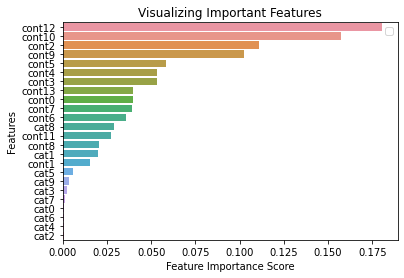

In [206]:
features_imprf=pd.Series(rfBst.feature_importances_,index=train_features.columns).sort_values(ascending=False)
sns.barplot(x=features_imprf, y=features_imprf.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()


In [208]:
test_predlabelsrfBst=rfBst.predict(test_features)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(test_labels, test_predlabelsrfBst))

Accuracy: 0.5496133333333333


In [209]:
test_predtargetclassRFBst=rfBst.predict(testOUT_features)

In [210]:
pd.DataFrame(test_predtargetclassXGBBst).value_counts()

True     100632
False     99368
dtype: int64

In [211]:
confusion_matrix(test_predtargetclassRFBst,test_predtargetclassXGBBst)

array([[78675, 19262],
       [20693, 81370]])

In [170]:
train.target[train.targetclass].describe()

count    150000.000000
mean          8.832534
std           0.494348
min           8.191374
25%           8.459245
50%           8.728637
75%           9.095079
max          10.411992
Name: target, dtype: float64

In [171]:
train.target[train.targetclass==False].describe()

count    150000.000000
mean          7.651423
std           0.415687
min           0.140329
25%           7.308693
50%           7.742069
75%           8.015701
max           8.191372
Name: target, dtype: float64

In [172]:
test_labels[test_xgbpredlabelsBst].describe()

count     37615
unique        2
top        True
freq      21420
Name: target, dtype: object

In [173]:
test_target=train.target[test_labels.index]

In [212]:
set1=pd.Series(test_xgbpredlabelsBst)
set2=pd.Series(test_predlabelsrfBst)
both1=np.array((set1.astype(int)+set2.astype(int))==2)
both1
both0=np.array((set1.astype(int)+set2.astype(int))==0)

In [213]:
test_targetxgbyrfpred1=test_target[both1==True]
test_targetxgbyrfpred1.describe()

count    30632.000000
mean         8.395432
std          0.721992
min          3.811876
25%          7.952975
50%          8.386640
75%          8.840281
max         10.411992
Name: target, dtype: float64

In [214]:
test_targetxgbyrfpred0=test_target[both0==True]
test_targetxgbyrfpred0.describe()

count    29696.000000
mean         8.092232
std          0.750031
min          0.592095
25%          7.505815
50%          8.075097
75%          8.518713
max         10.411427
Name: target, dtype: float64

In [215]:
xgb0rf1=np.array((set1.astype(int)+set2.astype(int))*set2.astype(int)==1)
test_targetxgb0rf1=test_target[xgb0rf1==True]
test_targetxgb0rf1.describe()

count    7689.000000
mean        8.148460
std         0.758180
min         2.659635
25%         7.581282
50%         8.108865
75%         8.622212
max        10.410762
Name: target, dtype: float64

In [216]:
xgb1rf0=np.array((set2.astype(int)+set1.astype(int))*set1.astype(int)==1)
test_targetxgb1rf0=test_target[xgb1rf0==True]
test_targetxgb1rf0.describe()

count    6983.000000
mean        8.334282
std         0.706083
min         4.861238
25%         7.903783
50%         8.313858
75%         8.807404
max        10.409563
Name: target, dtype: float64

In [222]:
test_targetcombpred=8.395432*both1+8.092232*both0+8.334282*xgb1rf0+8.148460*xgb0rf1
#test_targetcombpred=8.406351*both1+8.072521*both0+8.271977*xgb1rf0+8.236392*xgb0rf1
pd.DataFrame(test_targetcombpred).describe()

,0
count,75000.000000
mean,8.244368
std,0.142059
min,8.092232
25%,8.092232
50%,8.334282
75%,8.395432
max,8.395432


In [223]:
np.sqrt((np.square(test_target - test_targetcombpred)).mean()) #almost same obtained after submission

0.7355013779194315

In [224]:
Set1=pd.Series(test_predtargetclassXGBBst)
Set2=pd.Series(test_predtargetclassRFBst)
Both1=np.array((Set1.astype(int)+Set2.astype(int))==2)
Both0=np.array((Set1.astype(int)+Set2.astype(int))==0)
Xgb0rf1=np.array((Set1.astype(int)+Set2.astype(int))*Set2.astype(int)==1)
Xgb1rf0=np.array((Set2.astype(int)+Set1.astype(int))*Set1.astype(int)==1)


In [452]:
submissionCombClassifier=sample_submission
submissionCombClassifier.target = 8.395432*Both1+8.092232*Both0+8.334282*Xgb1rf0+8.148460*Xgb0rf1


In [226]:
submissionCombClassifier.target.value_counts()

8.395432    81370
8.092232    78675
8.148460    20693
8.334282    19262
Name: target, dtype: int64

In [227]:
submissionCombClassifier.to_csv("submission_CombClassifierbstrfyxgb.csv", index=False)

Model with XGBst at each one of the 4 leaves of combined classifiers

In [248]:
test_varsytarget=train.loc[test_labels.index,:]

In [249]:
test_varsytarget.columns

Index(['id', 'cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7',
       'cat8', 'cat9', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5',
       'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12',
       'cont13', 'target'],
      dtype='object')

In [720]:
sample_submission =pd.read_csv("sample_submission.csv")
submissionCombRegressor=sample_submission

xgb=1,rf=1

In [416]:
test_varsytargetboth1=test_varsytarget[both1==True]
test_varsytargetboth1[object_cols] = ordinal_encoder.transform(test_varsytargetboth1[object_cols])
train_featuresboth1, test_featuresboth1, train_labelsboth1, test_labelsboth1 = train_test_split(test_varsytargetboth1.loc[:,useful_features],test_varsytargetboth1.target,test_size=0.25)



In [417]:
train_featuresboth1.describe()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
count,22974.000000,22974.000000,22974.000000,22974.000000,22974.000000,22974.000000,22974.000000,22974.000000,22974.000000,22974.000000,...,22974.000000,22974.000000,22974.000000,22974.000000,22974.000000,22974.000000,22974.000000,22974.000000,22974.000000,22974.000000
mean,0.352790,0.455558,0.158919,1.779882,0.999478,1.801515,0.047271,3.920649,2.466440,7.352964,...,0.472580,0.467911,0.442000,0.530167,0.476722,0.419284,0.502205,0.467192,0.529057,0.478967
std,0.477848,0.498032,0.365608,0.663251,0.163483,0.966079,0.316046,0.524021,1.667943,3.425986,...,0.232444,0.215641,0.214557,0.207946,0.222754,0.187895,0.242098,0.217961,0.211031,0.217818
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.255923,0.045969,-0.224635,0.203932,-0.259942,0.117896,0.048807,0.052608,-0.073736,0.151112
25%,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,4.000000,2.000000,5.000000,...,0.279848,0.333368,0.323853,0.362313,0.331798,0.287414,0.310812,0.308936,0.362698,0.285766
50%,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,4.000000,2.000000,7.000000,...,0.328674,0.422396,0.408584,0.497969,0.425763,0.414307,0.476248,0.431025,0.489832,0.445384
75%,1.000000,1.000000,0.000000,2.000000,1.000000,3.000000,0.000000,4.000000,4.000000,10.000000,...,0.674810,0.610487,0.552647,0.660732,0.585816,0.514632,0.700649,0.635735,0.708075,0.644410
max,1.000000,1.000000,1.000000,3.000000,3.000000,3.000000,7.000000,7.000000,6.000000,14.000000,...,1.054514,1.067467,1.110488,1.032729,1.040116,0.981644,1.055770,1.071401,0.975017,0.905929


In [418]:
test_labelsboth1.describe()

count    7658.000000
mean        8.403001
std         0.723875
min         3.887960
25%         7.952349
50%         8.393753
75%         8.881427
max        10.411854
Name: target, dtype: float64

In [419]:
cota

8.191373

In [420]:
xgb_params = {'objective': 'reg:squarederror',
             'n_estimators': 20000,
             'booster': 'gbtree',
             'max_depth': 2,
             'learning_rate': 0.05344238585504369,
             'colsample_bytree': 0.182752418577295,
             'subsample': 0.5105633202654916,
             'alpha': 0.31497378201113674,
             'lambda': 0.08413322850225624,
             'min_child_weight': 148.2986978620488}

In [421]:
xgbyrf1regressor=XGBRegressor(**xgb_params,random_state=0)

In [422]:
xgbyrf1regressor.fit(train_featuresboth1,train_labelsboth1,eval_metric="rmse",early_stopping_rounds=1000,eval_set=[(test_featuresboth1, test_labelsboth1)])


[0]	validation_0-rmse:7.51623
Will train until validation_0-rmse hasn't improved in 1000 rounds.
[1]	validation_0-rmse:7.11885
[2]	validation_0-rmse:6.74340
[3]	validation_0-rmse:6.38774
[4]	validation_0-rmse:6.05137
[5]	validation_0-rmse:5.73280
[6]	validation_0-rmse:5.43215
[7]	validation_0-rmse:5.14729
[8]	validation_0-rmse:4.87843
[9]	validation_0-rmse:4.62423
[10]	validation_0-rmse:4.38386
[11]	validation_0-rmse:4.15672
[12]	validation_0-rmse:3.94181
[13]	validation_0-rmse:3.73886
[14]	validation_0-rmse:3.54733
[15]	validation_0-rmse:3.36638
[16]	validation_0-rmse:3.19552
[17]	validation_0-rmse:3.03422
[18]	validation_0-rmse:2.88212
[19]	validation_0-rmse:2.73879
[20]	validation_0-rmse:2.60339
[21]	validation_0-rmse:2.47567
[22]	validation_0-rmse:2.35504
[23]	validation_0-rmse:2.24181
[24]	validation_0-rmse:2.13541
[25]	validation_0-rmse:2.03501
[26]	validation_0-rmse:1.94077
[27]	validation_0-rmse:1.85234
[28]	validation_0-rmse:1.76929
[29]	validation_0-rmse:1.69143
[30]	validati

XGBRegressor(alpha=0.31497378201113674, base_score=0.5, booster='gbtree',
             colsample_bylevel=1, colsample_bynode=1,
             colsample_bytree=0.182752418577295, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             lambda=0.08413322850225624, learning_rate=0.05344238585504369,
             max_delta_step=0, max_depth=2, min_child_weight=148.2986978620488,
             missing=nan, monotone_constraints='()', n_estimators=20000,
             n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0.314973772, reg_lambda=0.0841332301, scale_pos_weight=1,
             subsample=0.5105633202654916, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [721]:
submissionCombRegressor.target[Both1]=xgbyrf1regressor.predict(testOUT_features[Both1],ntree_limit = xgbyrf1regressor.get_booster().best_ntree_limit)
#predict no es en todo testOUT_features

In [580]:
estimatorxgb1rf1 = XGBRegressor(
    objective= 'reg:squarederror',
    nthread=4,
    seed=42
)
parametersxgb1rf1 = {
    'alpha': [0.31497,0.63],
    'max_depth': [2,4],
    'n_estimators': [1000,1500],
    'learning_rate': [0.05344,0.09],
    'colsample_bynode': [0.5, 1],
    'colsample_bytree': [0.1827, 0.33],
    'lambda': [0.08, 0.16]
}
grid_search = GridSearchCV(
    estimator=estimatorxgb1rf1,
    param_grid=parametersxgb1rf1,
    scoring = 'roc_auc',
    n_jobs = 2,
    cv = 2,
    verbose=True
)
grid_search.fit(train_featuresboth1,train_labelsboth1)
grid_search.best_estimator_

Fitting 2 folds for each of 128 candidates, totalling 256 fits


XGBRegressor(alpha=0.31497, base_score=0.5, booster='gbtree',
             colsample_bylevel=1, colsample_bynode=0.5, colsample_bytree=0.1827,
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', lambda=0.08, learning_rate=0.05344,
             max_delta_step=0, max_depth=2, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=4, nthread=4,
             num_parallel_tree=1, random_state=42, reg_alpha=0.314969987,
             reg_lambda=0.0799999982, scale_pos_weight=1, seed=42, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [581]:
xgb_paramsbest = {'objective': 'reg:squarederror',
             'n_estimators': 8000,
             'booster': 'gbtree',
             'max_depth': 2,
             'learning_rate': 0.05344,
             'colsample_bytree': 0.1827,
                 'lambda': 0.08,
                  'alpha': 0.31497,
                 'colsample_bynode': 0.5}
xgb1rf1regressorbest=XGBRegressor(**xgb_paramsbest,random_state=42)
xgb1rf1regressorbest.fit(train_featuresboth1,train_labelsboth1,eval_metric="rmse",early_stopping_rounds=200,eval_set=[(test_featuresboth1, test_labelsboth1)])


[0]	validation_0-rmse:7.51614
Will train until validation_0-rmse hasn't improved in 200 rounds.
[1]	validation_0-rmse:7.11885
[2]	validation_0-rmse:6.74300
[3]	validation_0-rmse:6.38746
[4]	validation_0-rmse:6.05116
[5]	validation_0-rmse:5.73308
[6]	validation_0-rmse:5.43225
[7]	validation_0-rmse:5.14780
[8]	validation_0-rmse:4.87885
[9]	validation_0-rmse:4.62459
[10]	validation_0-rmse:4.38421
[11]	validation_0-rmse:4.15702
[12]	validation_0-rmse:3.94233
[13]	validation_0-rmse:3.73947
[14]	validation_0-rmse:3.54786
[15]	validation_0-rmse:3.36686
[16]	validation_0-rmse:3.19601
[17]	validation_0-rmse:3.03474
[18]	validation_0-rmse:2.88255
[19]	validation_0-rmse:2.73902
[20]	validation_0-rmse:2.60366
[21]	validation_0-rmse:2.47607
[22]	validation_0-rmse:2.35590
[23]	validation_0-rmse:2.24270
[24]	validation_0-rmse:2.13616
[25]	validation_0-rmse:2.03597
[26]	validation_0-rmse:1.94174
[27]	validation_0-rmse:1.85319
[28]	validation_0-rmse:1.77009
[29]	validation_0-rmse:1.69218
[30]	validatio

XGBRegressor(alpha=0.31497, base_score=0.5, booster='gbtree',
             colsample_bylevel=1, colsample_bynode=0.5, colsample_bytree=0.1827,
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', lambda=0.08, learning_rate=0.05344,
             max_delta_step=0, max_depth=2, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=8000, n_jobs=0,
             num_parallel_tree=1, random_state=42, reg_alpha=0.314969987,
             reg_lambda=0.0799999982, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

xgb=0,rf=0

In [425]:
test_varsytargetboth0=test_varsytarget[both0==True]
test_varsytargetboth0[object_cols] = ordinal_encoder.transform(test_varsytargetboth0[object_cols])
train_featuresboth0, test_featuresboth0, train_labelsboth0, test_labelsboth0 = train_test_split(test_varsytargetboth0.loc[:,useful_features],test_varsytargetboth0.target,test_size=0.25)



In [426]:
xgb_params = {'objective': 'reg:squarederror',
             'n_estimators': 20000,
             'booster': 'gbtree',
             'max_depth': 2,
             'learning_rate': 0.01344238585504369,
             'colsample_bytree': 0.182752418577295,
             'subsample': 0.5105633202654916,
             'alpha': 0.31497378201113674,
             'lambda': 0.08413322850225624,
             'min_child_weight': 148.2986978620488}

In [427]:
xgbyrf0regressor=XGBRegressor(**xgb_params,random_state=0)

In [428]:
xgbyrf0regressor.fit(train_featuresboth0,train_labelsboth0,eval_metric="rmse",early_stopping_rounds=1000,eval_set=[(test_featuresboth0, test_labelsboth0)])


[0]	validation_0-rmse:7.52807
Will train until validation_0-rmse hasn't improved in 1000 rounds.
[1]	validation_0-rmse:7.42790
[2]	validation_0-rmse:7.32901
[3]	validation_0-rmse:7.23154
[4]	validation_0-rmse:7.13536
[5]	validation_0-rmse:7.04050
[6]	validation_0-rmse:6.94691
[7]	validation_0-rmse:6.85462
[8]	validation_0-rmse:6.76376
[9]	validation_0-rmse:6.67397
[10]	validation_0-rmse:6.58543
[11]	validation_0-rmse:6.49819
[12]	validation_0-rmse:6.41189
[13]	validation_0-rmse:6.32698
[14]	validation_0-rmse:6.24317
[15]	validation_0-rmse:6.16038
[16]	validation_0-rmse:6.07885
[17]	validation_0-rmse:5.99839
[18]	validation_0-rmse:5.91895
[19]	validation_0-rmse:5.84068
[20]	validation_0-rmse:5.76347
[21]	validation_0-rmse:5.68733
[22]	validation_0-rmse:5.61217
[23]	validation_0-rmse:5.53809
[24]	validation_0-rmse:5.46497
[25]	validation_0-rmse:5.39295
[26]	validation_0-rmse:5.32185
[27]	validation_0-rmse:5.25166
[28]	validation_0-rmse:5.18250
[29]	validation_0-rmse:5.11437
[30]	validati

XGBRegressor(alpha=0.31497378201113674, base_score=0.5, booster='gbtree',
             colsample_bylevel=1, colsample_bynode=1,
             colsample_bytree=0.182752418577295, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             lambda=0.08413322850225624, learning_rate=0.01344238585504369,
             max_delta_step=0, max_depth=2, min_child_weight=148.2986978620488,
             missing=nan, monotone_constraints='()', n_estimators=20000,
             n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0.314973772, reg_lambda=0.0841332301, scale_pos_weight=1,
             subsample=0.5105633202654916, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [722]:
submissionCombRegressor.target[Both0]=xgbyrf0regressor.predict(testOUT_features[Both0],ntree_limit = xgbyrf0regressor.get_booster().best_ntree_limit)


In [367]:
submissionCombRegressor.target.value_counts()

8.148460    20693
8.334282    19262
8.275242        5
8.242525        5
8.389492        5
            ...  
7.907068        1
8.055449        1
8.277719        1
8.144869        1
8.393860        1
Name: target, Length: 142102, dtype: int64

In [368]:
pd.DataFrame(xgbyrf0regressor.predict(testOUT_features[Both0])).describe()

,0
count,78675.000000
mean,8.089785
std,0.156417
min,7.383497
25%,7.987527
50%,8.092228
75%,8.195403
max,8.747253


In [302]:
pd.DataFrame(submissionCombRegressor.target[Both0]).describe()

,target
count,78675.000000
mean,8.094464
std,0.128288
min,7.505573
25%,8.008865
50%,8.094139
75%,8.179961
max,8.668070


In [369]:
submissionCombRegressor.target

0         8.017565
1         8.467387
2         8.495615
3         8.334282
4         8.148460
            ...   
199995    8.086458
199996    8.443901
199997    8.469978
199998    8.042654
199999    7.705137
Name: target, Length: 200000, dtype: float64

In [ ]:
#Hyperparameter adjusting

In [552]:
estimatorxgb0rf0 = XGBRegressor(
    objective= 'reg:squarederror',
    nthread=4,
    seed=42
)
parametersxgb0rf0 = {
    'alpha': [0.315,0.63],
    'n_estimators': [1000,1500],
    'learning_rate': [0.007,0.07],
    'colsample_bynode': [0.02, 0.06],
    'colsample_bytree': [0.02, 0.06],
    'lambda': [0.08, 0.8]
}
grid_search = GridSearchCV(
    estimator=estimatorxgb0rf0,
    param_grid=parametersxgb0rf0,
    scoring = 'roc_auc',
    n_jobs = 2,
    cv = 2,
    verbose=True
)
grid_search.fit(train_featuresboth0,train_labelsboth0)
grid_search.best_estimator_


Fitting 2 folds for each of 64 candidates, totalling 128 fits


XGBRegressor(alpha=0.315, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=0.02, colsample_bytree=0.02, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='', lambda=0.08,
             learning_rate=0.007, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=4, nthread=4, num_parallel_tree=1,
             random_state=42, reg_alpha=0.314999998, reg_lambda=0.0799999982,
             scale_pos_weight=1, seed=42, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [560]:
xgb_paramsbest = {'objective': 'reg:squarederror',
             'n_estimators': 45000,
             'booster': 'gbtree',
             'max_depth': 2,
             'learning_rate': 0.013,
             'colsample_bytree': 0.33,
                 'lambda': 0.08,
                  'alpha': 0.315}
xgb0rf0regressorbest=XGBRegressor(**xgb_paramsbest,random_state=42)
xgb0rf0regressorbest.fit(train_featuresboth0,train_labelsboth0,eval_metric="rmse",early_stopping_rounds=500,eval_set=[(test_featuresboth0, test_labelsboth0)])


[0]	validation_0-rmse:7.53152
Will train until validation_0-rmse hasn't improved in 500 rounds.
[1]	validation_0-rmse:7.43458
[2]	validation_0-rmse:7.33892
[3]	validation_0-rmse:7.24452
[4]	validation_0-rmse:7.15135
[5]	validation_0-rmse:7.05942
[6]	validation_0-rmse:6.96869
[7]	validation_0-rmse:6.87914
[8]	validation_0-rmse:6.79078
[9]	validation_0-rmse:6.70357
[10]	validation_0-rmse:6.61751
[11]	validation_0-rmse:6.53258
[12]	validation_0-rmse:6.44876
[13]	validation_0-rmse:6.36606
[14]	validation_0-rmse:6.28445
[15]	validation_0-rmse:6.20391
[16]	validation_0-rmse:6.12444
[17]	validation_0-rmse:6.04600
[18]	validation_0-rmse:5.96861
[19]	validation_0-rmse:5.89223
[20]	validation_0-rmse:5.81686
[21]	validation_0-rmse:5.74249
[22]	validation_0-rmse:5.66911
[23]	validation_0-rmse:5.59671
[24]	validation_0-rmse:5.52524
[25]	validation_0-rmse:5.45473
[26]	validation_0-rmse:5.38515
[27]	validation_0-rmse:5.31649
[28]	validation_0-rmse:5.24875
[29]	validation_0-rmse:5.18189
[30]	validatio

XGBRegressor(alpha=0.315, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.33, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='', lambda=0.08,
             learning_rate=0.013, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=45000, n_jobs=0, num_parallel_tree=1, random_state=42,
             reg_alpha=0.314999998, reg_lambda=0.0799999982, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

xgb=1,rf=0

In [431]:
test_varsytargetXgb1rf0=test_varsytarget[xgb1rf0==True]
test_varsytargetXgb1rf0[object_cols] = ordinal_encoder.transform(test_varsytargetXgb1rf0[object_cols])
train_featuresXgb1rf0, test_featuresXgb1rf0, train_labelsXgb1rf0, test_labelsXgb1rf0 = train_test_split(test_varsytargetXgb1rf0.loc[:,useful_features],test_varsytargetXgb1rf0.target,test_size=0.25)


In [432]:
xgb_params = {'objective': 'reg:squarederror',
             'n_estimators': 20000,
             'booster': 'gbtree',
             'max_depth': 2,
             'learning_rate': 0.01344238585504369,
             'colsample_bytree': 0.182752418577295,
             'subsample': 0.5105633202654916,
             'alpha': 0.31497378201113674,
             'lambda': 0.08413322850225624,
             'min_child_weight': 148.2986978620488}
#xgb1rf0regressor=XGBRegressor(**xgb_params,random_state=0)

In [433]:
xgb1rf0regressor=XGBRegressor(**xgb_params,random_state=0)

In [434]:
xgb1rf0regressor.fit(train_featuresXgb1rf0,train_labelsXgb1rf0,eval_metric="rmse",early_stopping_rounds=1000,eval_set=[(test_featuresXgb1rf0, test_labelsXgb1rf0)])


[0]	validation_0-rmse:7.76388
Will train until validation_0-rmse hasn't improved in 1000 rounds.
[1]	validation_0-rmse:7.66041
[2]	validation_0-rmse:7.55850
[3]	validation_0-rmse:7.45795
[4]	validation_0-rmse:7.35857
[5]	validation_0-rmse:7.26064
[6]	validation_0-rmse:7.16414
[7]	validation_0-rmse:7.06863
[8]	validation_0-rmse:6.97466
[9]	validation_0-rmse:6.88193
[10]	validation_0-rmse:6.79062
[11]	validation_0-rmse:6.70037
[12]	validation_0-rmse:6.61128
[13]	validation_0-rmse:6.52336
[14]	validation_0-rmse:6.43659
[15]	validation_0-rmse:6.35113
[16]	validation_0-rmse:6.26689
[17]	validation_0-rmse:6.18364
[18]	validation_0-rmse:6.10161
[19]	validation_0-rmse:6.02074
[20]	validation_0-rmse:5.94106
[21]	validation_0-rmse:5.86238
[22]	validation_0-rmse:5.78467
[23]	validation_0-rmse:5.70821
[24]	validation_0-rmse:5.63288
[25]	validation_0-rmse:5.55858
[26]	validation_0-rmse:5.48526
[27]	validation_0-rmse:5.41277
[28]	validation_0-rmse:5.34139
[29]	validation_0-rmse:5.27112
[30]	validati

XGBRegressor(alpha=0.31497378201113674, base_score=0.5, booster='gbtree',
             colsample_bylevel=1, colsample_bynode=1,
             colsample_bytree=0.182752418577295, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             lambda=0.08413322850225624, learning_rate=0.01344238585504369,
             max_delta_step=0, max_depth=2, min_child_weight=148.2986978620488,
             missing=nan, monotone_constraints='()', n_estimators=20000,
             n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0.314973772, reg_lambda=0.0841332301, scale_pos_weight=1,
             subsample=0.5105633202654916, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [723]:
submissionCombRegressor.target[Xgb1rf0]=xgb1rf0regressor.predict(testOUT_features[Xgb1rf0],ntree_limit = xgb1rf0regressor.get_booster().best_ntree_limit)


In [376]:
submissionCombRegressor.target.value_counts()

8.148460    20693
8.339462        6
8.351246        6
8.301395        5
8.262629        5
            ...  
8.307014        1
8.268767        1
8.270351        1
7.995039        1
8.393860        1
Name: target, Length: 154954, dtype: int64

In [377]:
submissionCombRegressor.target

0         8.017565
1         8.467387
2         8.495615
3         8.349754
4         8.148460
            ...   
199995    8.086458
199996    8.443901
199997    8.469978
199998    8.042654
199999    7.705137
Name: target, Length: 200000, dtype: float64

xgb=0,rf=1

In [437]:
test_varsytargetXgb0rf1=test_varsytarget[xgb0rf1==True]
test_varsytargetXgb0rf1[object_cols] = ordinal_encoder.transform(test_varsytargetXgb0rf1[object_cols])
train_featuresXgb0rf1, test_featuresXgb0rf1, train_labelsXgb0rf1, test_labelsXgb0rf1 = train_test_split(test_varsytargetXgb0rf1.loc[:,useful_features],test_varsytargetXgb0rf1.target,test_size=0.25)


In [489]:
#HYPERPARAMETERS ADJUSTING BY GRIDSEARCH
estimatorxgb0rf1 = XGBRegressor(
    objective= 'reg:squarederror',
    nthread=4,
    seed=42
)


In [561]:
parametersxgb0rf1 = {
    'max_depth': [2,3,4],
    'n_estimators': [200,500],
    'learning_rate': [0.007,0.009, 0.02],
    'colsample_bytree': [0.1, 0.2, 0.33]
}

In [562]:
grid_search = GridSearchCV(
    estimator=estimatorxgb0rf1,
    param_grid=parametersxgb0rf1,
    scoring = 'roc_auc',
    n_jobs = 2,
    cv = 2,
    verbose=True
)

In [563]:
grid_search.fit(train_featuresXgb0rf1,train_labelsXgb0rf1)

Fitting 2 folds for each of 54 candidates, totalling 108 fits


GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...hread=4,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, seed=42,
                                    subsample=None, tree_method=None

In [564]:
grid_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.007, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=4, nthread=4, num_parallel_tree=1,
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=42, subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [577]:
xgb_paramsbest = {'objective': 'reg:squarederror',
             'n_estimators': 4000,
             'booster': 'gbtree',
             'max_depth': 2,
             'learning_rate': 0.0075,
             'colsample_bytree': 0.1,
             'colsample_bynode': 0.1}

In [578]:
xgb0rf1regressorbest=XGBRegressor(**xgb_paramsbest,random_state=42)

In [579]:
xgb0rf1regressorbest.fit(train_featuresXgb0rf1,train_labelsXgb0rf1,eval_metric="rmse",early_stopping_rounds=300,eval_set=[(test_featuresXgb0rf1, test_labelsXgb0rf1)])


[0]	validation_0-rmse:7.62642
Will train until validation_0-rmse hasn't improved in 300 rounds.
[1]	validation_0-rmse:7.56976
[2]	validation_0-rmse:7.51354
[3]	validation_0-rmse:7.45773
[4]	validation_0-rmse:7.40236
[5]	validation_0-rmse:7.34739
[6]	validation_0-rmse:7.29285
[7]	validation_0-rmse:7.23872
[8]	validation_0-rmse:7.18500
[9]	validation_0-rmse:7.13169
[10]	validation_0-rmse:7.07878
[11]	validation_0-rmse:7.02627
[12]	validation_0-rmse:6.97416
[13]	validation_0-rmse:6.92244
[14]	validation_0-rmse:6.87112
[15]	validation_0-rmse:6.82019
[16]	validation_0-rmse:6.76964
[17]	validation_0-rmse:6.71947
[18]	validation_0-rmse:6.66969
[19]	validation_0-rmse:6.62028
[20]	validation_0-rmse:6.57125
[21]	validation_0-rmse:6.52260
[22]	validation_0-rmse:6.47431
[23]	validation_0-rmse:6.42638
[24]	validation_0-rmse:6.37883
[25]	validation_0-rmse:6.33163
[26]	validation_0-rmse:6.28479
[27]	validation_0-rmse:6.23831
[28]	validation_0-rmse:6.19218
[29]	validation_0-rmse:6.14640
[30]	validatio

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=0.1, colsample_bytree=0.1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.0075, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=4000, n_jobs=0, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [582]:
#With adjusted RF

In [588]:
from sklearn.ensemble import RandomForestRegressor

In [589]:
estimatorRF = RandomForestRegressor(
)
parametersRF = {
    'max_depth': range (2, 8, 2),
    'n_estimators': range(100, 400, 100),
    'min_samples_split': [0.0001, 0.001, 0.01],
    'max_features': ["sqrt","log2"],
    'bootstrap': [True, False],
    'criterion': ["mse","mae"]
}
grid_searchRFxgb0rf1 = GridSearchCV(
    estimator=estimatorRF,
    param_grid=parametersRF,
    n_jobs = 2,
    cv = 2,
    verbose=True
)





In [590]:
grid_searchRFxgb0rf1.fit(train_featuresXgb0rf1,train_labelsXgb0rf1)
grid_searchRFxgb0rf1.best_estimator_

Fitting 2 folds for each of 108 candidates, totalling 216 fits


RandomForestRegressor(max_depth=2, max_features='sqrt', min_samples_split=0.01)

In [627]:
rfBstxgb0rf1=RandomForestRegressor(max_depth=4, max_features='sqrt',min_samples_split=0.03, n_estimators=6500, criterion="mse")
rfBstxgb0rf1.fit(train_featuresXgb0rf1,train_labelsXgb0rf1)

RandomForestRegressor(max_depth=4, max_features='sqrt', min_samples_split=0.03,
                      n_estimators=6500)

In [624]:
import math

In [625]:
test_predlabelsrfBstxgb0rf1=rfBstxgb0rf1.predict(test_featuresXgb0rf1)
from sklearn.metrics import mean_squared_error
print("RMSE:",math.sqrt(mean_squared_error(test_labelsXgb0rf1, test_predlabelsrfBstxgb0rf1)))

RMSE: 0.7356425407977084


In [446]:
xgb_params = {'objective': 'reg:squarederror',
             'n_estimators': 20000,
             'booster': 'gbtree',
             'max_depth': 8,
             'learning_rate': 0.01044238585504369,
             'colsample_bytree': 0.182752418577295,
             'subsample': 0.5105633202654916,
             'alpha': 0.31497378201113674,
             'lambda': 0.08413322850225624,
             'min_child_weight': 148.2986978620488}
xgb0rf1regressor=XGBRegressor(**xgb_params,random_state=0)

In [447]:
xgb0rf1regressor.fit(train_featuresXgb0rf1,train_labelsXgb0rf1,eval_metric="rmse",early_stopping_rounds=1000,eval_set=[(test_featuresXgb0rf1, test_labelsXgb0rf1)])


[0]	validation_0-rmse:7.60412
Will train until validation_0-rmse hasn't improved in 1000 rounds.
[1]	validation_0-rmse:7.52555
[2]	validation_0-rmse:7.44754
[3]	validation_0-rmse:7.37049
[4]	validation_0-rmse:7.29409
[5]	validation_0-rmse:7.21868
[6]	validation_0-rmse:7.14405
[7]	validation_0-rmse:7.07027
[8]	validation_0-rmse:6.99732
[9]	validation_0-rmse:6.92491
[10]	validation_0-rmse:6.85360
[11]	validation_0-rmse:6.78275
[12]	validation_0-rmse:6.71265
[13]	validation_0-rmse:6.64342
[14]	validation_0-rmse:6.57499
[15]	validation_0-rmse:6.50721
[16]	validation_0-rmse:6.44002
[17]	validation_0-rmse:6.37370
[18]	validation_0-rmse:6.30817
[19]	validation_0-rmse:6.24320
[20]	validation_0-rmse:6.17892
[21]	validation_0-rmse:6.11542
[22]	validation_0-rmse:6.05261
[23]	validation_0-rmse:5.99049
[24]	validation_0-rmse:5.92892
[25]	validation_0-rmse:5.86800
[26]	validation_0-rmse:5.80763
[27]	validation_0-rmse:5.74814
[28]	validation_0-rmse:5.68930
[29]	validation_0-rmse:5.63100
[30]	validati

XGBRegressor(alpha=0.31497378201113674, base_score=0.5, booster='gbtree',
             colsample_bylevel=1, colsample_bynode=1,
             colsample_bytree=0.182752418577295, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             lambda=0.08413322850225624, learning_rate=0.01044238585504369,
             max_delta_step=0, max_depth=8, min_child_weight=148.2986978620488,
             missing=nan, monotone_constraints='()', n_estimators=20000,
             n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0.314973772, reg_lambda=0.0841332301, scale_pos_weight=1,
             subsample=0.5105633202654916, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [724]:
submissionCombRegressor.target[Xgb0rf1]=xgb0rf1regressor.predict(testOUT_features[Xgb0rf1],ntree_limit = xgb0rf1regressor.get_booster().best_ntree_limit)


In [401]:
submissionCombRegressor.target.value_counts()

8.351246    6
8.339462    6
8.343693    5
8.282166    5
8.262629    5
           ..
8.233927    1
8.109585    1
8.293198    1
8.384384    1
8.393860    1
Name: target, Length: 170384, dtype: int64

In [402]:
submissionCombRegressor.target

0         8.017565
1         8.467387
2         8.495615
3         8.349754
4         8.152763
            ...   
199995    8.086458
199996    8.443901
199997    8.469978
199998    8.042654
199999    7.705137
Name: target, Length: 200000, dtype: float64

In [403]:
submissionCombRegressor.target.describe()

count    200000.000000
mean          8.240066
std           0.190375
min           7.383497
25%           8.105746
50%           8.260717
75%           8.375103
max           8.929777
Name: target, dtype: float64

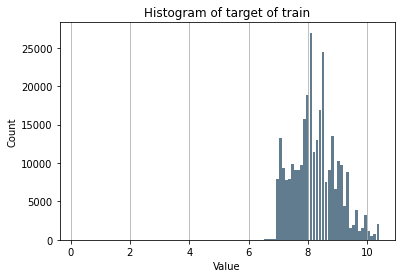

In [404]:
size, scale = 1000, 10
targets = pd.Series(train.target)

targets.plot.hist(grid=True, bins=100, rwidth=0.9,
                   color='#607c8e')
plt.title('Histogram of target of train')
plt.ylabel('Count')
plt.xlabel('Value')
plt.grid(axis='y', alpha=0.75)

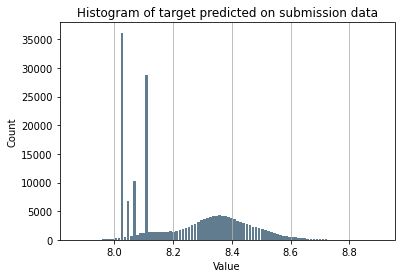

In [731]:
size, scale = 1000, 10
targets = pd.Series(submissionCombRegressor.target)

targets.plot.hist(grid=True, bins=100, rwidth=0.9,
                   color='#607c8e')
plt.title('Histogram of target predicted on submission data')
plt.ylabel('Count')
plt.xlabel('Value')
plt.grid(axis='y', alpha=0.75)

In [450]:
submissionCombRegressor.to_csv("submission_CombRegressor.csv", index=False)

In [631]:
pd.DataFrame(Xgb0rf1).value_counts()

False    179307
True      20693
dtype: int64

In [634]:
pd.DataFrame(Both0).value_counts()

False    121325
True      78675
dtype: int64

In [635]:
pd.DataFrame(Both1).value_counts()

False    118630
True      81370
dtype: int64

In [636]:
pd.DataFrame(Xgb1rf0).value_counts()

False    180738
True      19262
dtype: int64

In [637]:
submissionCombRegressor.target.value_counts()

8.395432    81370
8.092232    78675
8.148460    20693
8.334282    19262
Name: target, dtype: int64

In [638]:
submissionCombClassifier=sample_submission
submissionCombClassifier.target = 8.395432*Both1+8.092232*Both0+8.334282*Xgb1rf0+8.148460*Xgb0rf1

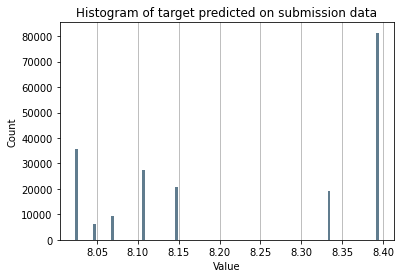

In [729]:
size, scale = 1000, 10
targets = pd.Series(submissionCombClassifier.target)

targets.plot.hist(grid=True, bins=100, rwidth=0.9,
                   color='#607c8e')
plt.title('Histogram of target predicted on submission data')
plt.ylabel('Count')
plt.xlabel('Value')
plt.grid(axis='y', alpha=0.75)

In [640]:
submissionCombClassifier.to_csv("submission_CombClassifier_original.csv", index=False)

In [641]:
pd.DataFrame(test_labelsXgb0rf1).describe()

,target
count,1923.000000
mean,8.148173
std,0.736223
min,5.591634
25%,7.574765
50%,8.104251
75%,8.607933
max,10.406659


In [642]:
pd.DataFrame(test_labelsboth0).describe()

,target
count,7424.000000
mean,8.093298
std,0.744917
min,2.691913
25%,7.512865
50%,8.071696
75%,8.518433
max,10.411016


In [643]:
submissionCombClassifier.target = 8.395432*Both1+7.512865*Both0+8.334282*Xgb1rf0+8.148460*Xgb0rf1

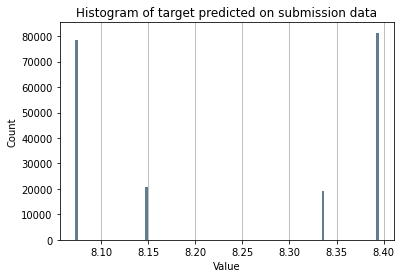

In [647]:
size, scale = 1000, 10
targets = pd.Series(submissionCombClassifier.target)

targets.plot.hist(grid=True, bins=100, rwidth=0.9,
                   color='#607c8e')
plt.title('Histogram of target predicted on submission data')
plt.ylabel('Count')
plt.xlabel('Value')
plt.grid(axis='y', alpha=0.75)

In [645]:
submissionCombClassifier.to_csv("submission_CombClassifier_BAJOBOTH025PERC.csv", index=False)

In [648]:
submissionCombClassifier.target = 8.395432*Both1+8.071696*Both0+8.334282*Xgb1rf0+8.148460*Xgb0rf1

In [649]:
submissionCombClassifier.to_csv("submission_CombClassifier_BAJOBOTH050PERC.csv", index=False)

In [662]:
submissionCombClassifier.target = 8.395432*Both1+8.085*Both0+8.334282*Xgb1rf0+8.148460*Xgb0rf1

In [663]:
submissionCombClassifier.to_csv("submission_CombClassifier_BAJOBOTH055PERC.csv", index=False)

In [664]:
cota

8.191373

In [667]:
submissionCombClassifier.target = 8.395432*Both1+8.092232*Both0+8.334282*Xgb1rf0+8.16*Xgb0rf1

In [666]:
submissionCombClassifier.to_csv("submission_CombClassifier_subo816xgborf1.csv", index=False)

In [713]:
submissionCombClassifier.target = 8.395432*Both1+8.092232*Both0+8.334282*Xgb1rf0+8.148460*Xgb0rf1

In [669]:
submissionCombClassifier.to_csv("submission_CombClassifier_subo8135xgborf1.csv", index=False)

In [670]:
pd.DataFrame(train_labelsboth0).describe()

,target
count,22272.000000
mean,8.091876
std,0.751744
min,0.592095
25%,7.503215
50%,8.076630
75%,8.518860
max,10.411427


In [671]:
pd.DataFrame(test_labelsboth0).describe()

,target
count,7424.000000
mean,8.093298
std,0.744917
min,2.691913
25%,7.512865
50%,8.071696
75%,8.518433
max,10.411016


Training XGB classifier on Both0

In [675]:
cotahigh=8.075097
test_varsytargetboth0.targetclassboth0=(test_varsytargetboth0.target>cotahigh)
train_featuresboth0high, test_featuresboth0high, train_labelsboth0high, test_labelsboth0high = train_test_split(test_varsytargetboth0.loc[:,useful_features],test_varsytargetboth0.targetclassboth0,test_size=0.25)


In [676]:
estimatorxgb0rf0 = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)
parametersxgb0rf0 = {
    'max_depth': range (2, 6, 2),
    'n_estimators': range(100, 200, 100),
    'learning_rate': [0.1, 0.3, 0.5],
    'colsample_bynode': [0.6, 0.8, 1],
    'colsample_bytree': [0.6, 0.8, 1]
}
grid_search = GridSearchCV(
    estimator=estimatorxgb0rf0,
    param_grid=parametersxgb0rf0,
    n_jobs = 2,
    cv = 2,
    verbose=True
)
grid_search.fit(train_featuresboth0high,train_labelsboth0high)
grid_search.best_estimator_


Fitting 2 folds for each of 54 candidates, totalling 108 fits


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=0.8, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=42, subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [692]:
BstxgbBOTH0 = XGBClassifier(learning_rate=0.1,colsample_bynode=0.8, colsample_bytree=1,max_depth=2,n_estimators=150)
BstxgbBOTH0.fit(train_featuresboth0high,train_labelsboth0high)
test_xgbpredlabelsBstBOTH0 = BstxgbBOTH0.predict(test_featuresboth0high)
print("Accuracy:",math.sqrt(metrics.accuracy_score(test_labelsboth0high, test_xgbpredlabelsBstBOTH0)))
test_predtargetclassXGBBstboth0=BstxgbBOTH0.predict(testOUT_features[Both0])

Accuracy: 0.7274816326630309


In [693]:
Set1BOTH0=pd.Series(test_predtargetclassXGBBstboth0)
XGB1BOTH0=np.array(Set1BOTH0.astype(int)==1)
XGB0BOTH0=np.array(Set1BOTH0.astype(int)==0)

In [714]:
submissionCombClassifier.target[Both0]=8.518713*XGB1BOTH0+7.505815*XGB0BOTH0

In [715]:
submissionCombClassifier.to_csv("submission_CombClassifier_both0dividedXGBClassifier.csv", index=False)

RF with asjustements

In [696]:
estimatorRFboth0 = RandomForestClassifier(
)
parametersRFboth0 = {
    'max_depth': range (2, 8, 2),
    'n_estimators': range(100, 300, 100),
    'min_samples_split': [0.0001, 0.001, 0.01],
    'criterion': ["gini", "entropy"],
    'max_features': ["sqrt","log2"]
}
grid_searchRFboth0 = GridSearchCV(
    estimator=estimatorRFboth0,
    param_grid=parametersRFboth0,
    scoring = 'roc_auc',
    n_jobs = 2,
    cv = 2,
    verbose=True
)



In [697]:
grid_searchRFboth0.fit(train_featuresboth0high,train_labelsboth0high)
grid_searchRFboth0.best_estimator_




Fitting 2 folds for each of 72 candidates, totalling 144 fits


RandomForestClassifier(max_depth=6, max_features='sqrt', min_samples_split=0.01,
                       n_estimators=200)

In [698]:
rfBstboth0=RandomForestClassifier(max_depth=6, max_features='sqrt',min_samples_split=0.01, n_estimators=200)
rfBstboth0.fit(train_featuresboth0high,train_labelsboth0high)
test_rfpredlabelsBstboth0 = rfBstboth0.predict(test_featuresboth0high)


In [700]:
print("Accuracy:", math.sqrt(metrics.accuracy_score(test_labelsboth0high, test_rfpredlabelsBstboth0)))
test_predtargetclassrfBstboth0=rfBstboth0.predict(testOUT_features[Both0])

Accuracy: 0.7247918845172516


In [701]:
Set2BOTH0=pd.Series(test_predtargetclassrfBstboth0)
Both1BOTH0=np.array((Set1BOTH0.astype(int)+Set2BOTH0.astype(int))==2)
Both0BOTH0=np.array((Set1BOTH0.astype(int)+Set2BOTH0.astype(int))==0)
Xgb0rf1BOTH0=np.array((Set1BOTH0.astype(int)+Set2BOTH0.astype(int))*Set2BOTH0.astype(int)==1)
Xgb1rf0BOTH0=np.array((Set2BOTH0.astype(int)+Set1BOTH0.astype(int))*Set1BOTH0.astype(int)==1)


In [704]:
set1BOTH0=pd.Series(test_xgbpredlabelsBstBOTH0)
set2BOTH0=pd.Series(test_rfpredlabelsBstboth0)
both1BOTH0=np.array((set1BOTH0.astype(int)+set2BOTH0.astype(int))==2)
both0BOTH0=np.array((set1BOTH0.astype(int)+set2BOTH0.astype(int))==0)

In [705]:
xgb0rf1BOTH0=np.array((set1BOTH0.astype(int)+set2BOTH0.astype(int))*set2BOTH0.astype(int)==1)
xgb1rf0BOTH0=np.array((set2BOTH0.astype(int)+set1BOTH0.astype(int))*set1BOTH0.astype(int)==1)


In [707]:
#Both1
test_varsytargetboth0high=test_varsytargetboth0.loc[test_labelsboth0high.index,:]
test_targetboth1BOTH0=test_varsytargetboth0high[both1BOTH0==True]
test_targetboth1BOTH0.target.describe()

count    2558.000000
mean        8.189966
std         0.750764
min         4.798811
25%         7.649612
50%         8.108061
75%         8.547618
max        10.411427
Name: target, dtype: float64

In [708]:
#Both0
test_targetboth0BOTH0=test_varsytargetboth0high[both0BOTH0==True]
test_targetboth0BOTH0.target.describe()

count    3353.000000
mean        8.019652
std         0.769503
min         0.592095
25%         7.420240
50%         8.022640
75%         8.506882
max        10.392880
Name: target, dtype: float64

In [709]:
#xgb0rf1BOTH0
test_targetxgb0rf1BOTH0=test_varsytargetboth0high[xgb0rf1BOTH0==True]
test_targetxgb0rf1BOTH0.target.describe()

count    614.000000
mean       8.062978
std        0.747534
min        6.529404
25%        7.462503
50%        8.047501
75%        8.481187
max       10.409579
Name: target, dtype: float64

In [710]:
#xgb1rf0BOTH0
test_targetxgb1rf0BOTH0=test_varsytargetboth0high[xgb1rf0BOTH0==True]
test_targetxgb1rf0BOTH0.target.describe()

count    899.000000
mean       8.102204
std        0.722304
min        6.943828
25%        7.503432
50%        8.069206
75%        8.575190
max       10.397505
Name: target, dtype: float64

In [728]:
submissionCombClassifier.target[Both0]=8.189966*Both1BOTH0+7.7*Both0BOTH0+7.9*Xgb0rf1BOTH0+8.069206*Xgb1rf0BOTH0


In [718]:
submissionCombClassifier.target.value_counts()

8.395432    81370
8.019652    35739
8.189966    27514
8.148460    20693
8.334282    19262
8.102204     9347
8.062978     6075
Name: target, dtype: int64

In [719]:
submissionCombClassifier.to_csv("submission_CombClassifier_both0dividedXGBandRFClassifiers.csv", index=False)


In [735]:
submissionCombRegressor.target[Both0]=8.189966*Both1BOTH0+8.019652*Both0BOTH0+8.062978*Xgb0rf1BOTH0+8.102204*Xgb1rf0BOTH0


In [736]:
submissionCombRegressor.to_csv("submission_CombRegressor_both0dividedXGBandRFClassifiers.csv", index=False)


In [1]:
Both0

NameError: name 'Both0' is not defined